In [1]:
# MobileNetV2 for Sugarcane Dataset

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from glob import glob
import os

# Paths
sugarcane_path = '../Datasets/Sugarcane_leafs/'
IMAGE_SIZE = [224, 224]

# Load base model
mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze layers
for layer in mobilenet.layers:
    layer.trainable = False

# Output layer
folders = glob(sugarcane_path + '/*')
x = Flatten()(mobilenet.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=mobilenet.input, outputs=prediction)

# Summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [2]:
# Compile
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_set = train_datagen.flow_from_directory(
    sugarcane_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

valid_set = train_datagen.flow_from_directory(
    sugarcane_path,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train
r = model.fit(
    train_set,
    validation_data=valid_set,
    epochs=10,
    steps_per_epoch=len(train_set),
    validation_steps=len(valid_set)
)

Found 15943 images belonging to 6 classes.
Found 3983 images belonging to 6 classes.
Epoch 1/10
499/499 [==============================] - 1483s 3s/step - loss: 3.4486 - accuracy: 0.7127 - val_loss: 1.9014 - val_accuracy: 0.8406
Epoch 2/10
499/499 [==============================] - 1331s 3s/step - loss: 3.0285 - accuracy: 0.7980 - val_loss: 1.8231 - val_accuracy: 0.8579
Epoch 3/10
499/499 [==============================] - 1400s 3s/step - loss: 2.7397 - accuracy: 0.8328 - val_loss: 2.5023 - val_accuracy: 0.8599
Epoch 4/10
499/499 [==============================] - 1461s 3s/step - loss: 2.5586 - accuracy: 0.8490 - val_loss: 1.6852 - val_accuracy: 0.8905
Epoch 5/10
499/499 [==============================] - 1112s 2s/step - loss: 2.2901 - accuracy: 0.8623 - val_loss: 2.4461 - val_accuracy: 0.8730
Epoch 6/10
499/499 [==============================] - 994s 2s/step - loss: 2.2759 - accuracy: 0.8739 - val_loss: 1.8279 - val_accuracy: 0.8888
Epoch 7/10
499/499 [==============================] 

In [3]:
# Evaluation
loss, accuracy = model.evaluate(valid_set)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

125/125 [==============================] - 203s 2s/step - loss: 2.9529 - accuracy: 0.8810
Validation Loss: 2.9529199600219727
Validation Accuracy: 0.8809942007064819


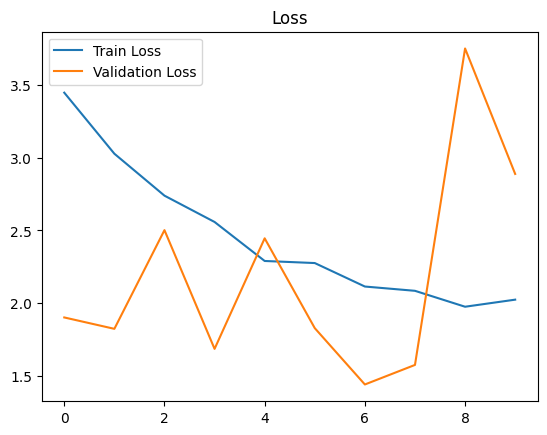

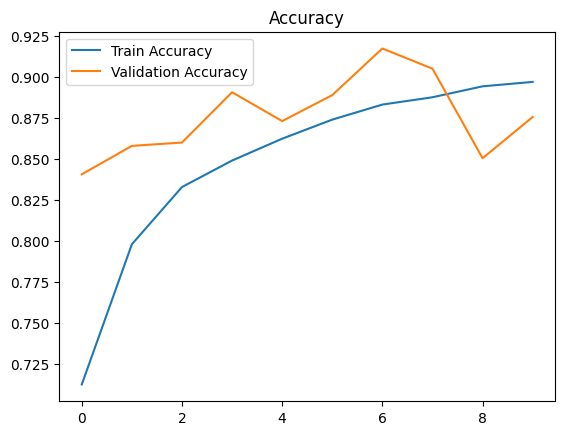

In [4]:
# Plots
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

In [5]:
# Save
model.save('../Models/sugarcane_mobilenet_model.h5')